# Vector calculus in the Euclidean plane

This notebook illustrates some vector calculus capabilities of SageMath within the 2-dimensional Euclidean space. The corresponding tools have been developed within
the [SageManifolds](https://sagemanifolds.obspm.fr) project.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Notebooks/SM_Euclidean_plane.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with the Jupyter interface, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 8.3 is required to run this notebook:

In [1]:
version()

'SageMath version 8.7, Release Date: 2019-03-23'

First we set up the notebook to display math formulas using LaTeX formatting:

In [2]:
%display latex

## 1. Defining the Euclidean plane

We define the Euclidean plane $\mathbb{E}^2$ as a 2-dimensional Euclidean space, with Cartesian coordinates $(x,y)$:

In [3]:
E.<x,y> = EuclideanSpace()
print(E)
E

Euclidean plane E^2


Euclidean plane E^2

Thanks to the use of `<x,y>` in the above command, the Python variables `x` and `y` are assigned to the symbolic variables $x$ and $y$ describing the Cartesian coordinates: 

In [4]:
type(y)

<type 'sage.symbolic.expression.Expression'>

Instead of using the variables `x` and `y`, one may also access to the coordinates by their indices in the chart of Cartesian coordinates:

In [5]:
cartesian = E.cartesian_coordinates()
cartesian

Chart (E^2, (x, y))

In [6]:
cartesian[1]

x

In [7]:
cartesian[2]

y

In [8]:
y is cartesian[2]

True

Each of the Cartesian coordinates spans the entire real line:

In [9]:
cartesian.coord_range()

x: (-oo, +oo); y: (-oo, +oo)

## 2. Vector fields

The Euclidean plane $\mathbb{E}^2$ is canonically endowed with the vector frame associated with Cartesian coordinates:

In [10]:
E.default_frame()

Coordinate frame (E^2, (e_x,e_y))

Vector fields on $\mathbb{E}^2$ are then defined from their components in that frame:

In [11]:
v = E.vector_field(-y, x, name='v')
v.display()

v = -y e_x + x e_y

The access to individual components is performed by the square bracket operator:

In [12]:
v[1]

-y

In [13]:
v[:]

[-y, x]

A plot of the vector field $v$ (this is with default parameters, see the [list of options](http://doc.sagemath.org/html/en/reference/manifolds/sage/manifolds/differentiable/vectorfield.html#sage.manifolds.differentiable.vectorfield.VectorField.plot) for customizing the plot):

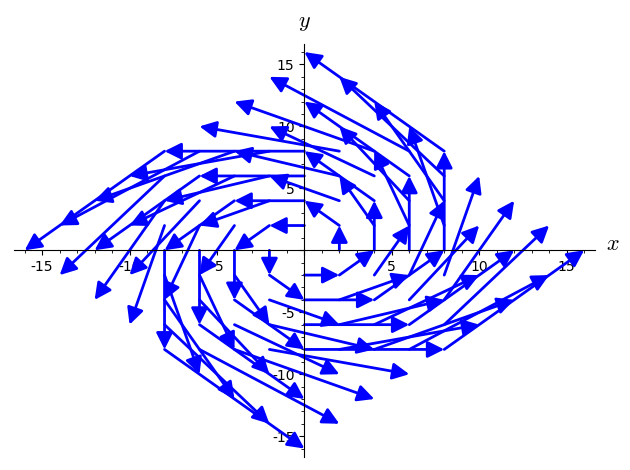

In [14]:
v.plot()

One may also define a vector field by setting the components in a second stage:

In [15]:
w = E.vector_field(name='w')
w[1] = function('w_x')(x,y)
w[2] = function('w_y')(x,y)
w.display()

w = w_x(x, y) e_x + w_y(x, y) e_y

Note that in the above example the components of $w$ are unspecified functions of $(x,y)$, contrary to the components of $v$.

Standard linear algebra operations are available on vector fields:

In [16]:
s = 2*v + x*w
s.display()

(x*w_x(x, y) - 2*y) e_x + (x*w_y(x, y) + 2*x) e_y

### Scalar product and norm

The dot (scalar) product of $v$ by $w$ in performed by the operator `dot_product`; it gives rise to a scalar field on $\mathbb{E}^2$:

In [17]:
s = v.dot_product(w)
print(s)

Scalar field v.w on the Euclidean plane E^2


A shortcut alias of `dot_product` is `dot`:

In [18]:
s == v.dot(w)

True

In [19]:
s.display()

v.w: E^2 --> R
   (x, y) |--> -y*w_x(x, y) + x*w_y(x, y)

The symbolic expression representing the scalar field $v\cdot w$ is obtained by means of the method `expr()`:

In [20]:
s.expr()

-y*w_x(x, y) + x*w_y(x, y)

The Euclidean norm of the vector field $v$ is a scalar field on $\mathbb{E}^2$:

In [21]:
s = norm(v)
s.display()

|v|: E^2 --> R
   (x, y) |--> sqrt(x^2 + y^2)

Again, the corresponding symbolic expression is obtained via `expr()`:

In [22]:
s.expr()

sqrt(x^2 + y^2)

In [23]:
norm(w).expr()

sqrt(w_x(x, y)^2 + w_y(x, y)^2)

We have of course $\|v\|^2 = v\cdot v$ :

In [24]:
norm(v)^2 == v.dot(v)

True

### Values at a given point

We introduce a point $p\in \mathbb{E}^2$ via the generic SageMath syntax for creating an element from its parent (here $\mathbb{E}^2$), i.e. the call operator `()`, with the Cartesian coordinates of the point as the first argument:

In [25]:
p = E((-2,3), name='p')
print(p)

Point p on the Euclidean plane E^2


The coordinates of $p$ are returned by the method ``coord()``:

In [26]:
p.coord()

(-2, 3)

or by letting the chart `cartesian` act on the point:

In [27]:
cartesian(p)

(-2, 3)

The value of the scalar field ``s = norm(v)`` at $p$ is

In [28]:
s(p)

sqrt(13)

The value of a vector field at $p$ is obtained by the method `at` (since the call operator `()` is reserved for the action of vector fields on scalar fields, see Section 5 below):

In [29]:
vp = v.at(p)
print(vp)

Vector v at Point p on the Euclidean plane E^2


In [30]:
vp.display()

v = -3 e_x - 2 e_y

In [31]:
wp = w.at(p)
wp.display()

w = w_x(-2, 3) e_x + w_y(-2, 3) e_y

In [32]:
s = v.at(p) + pi*w.at(p)
s.display()

(pi*w_x(-2, 3) - 3) e_x + (pi*w_y(-2, 3) - 2) e_y

## 3. Differential operators

Tu use functional notations, i.e. `div(v)` instead of `v.div()` for the divergence of the vector field `v`, we import the functions `div`, `grad`, etc. in the global namespace:

In [33]:
from sage.manifolds.operators import *

### Divergence

The divergence of a vector field is returned by the function `div`; the output is a scalar field on $\mathbb{E}^2$:

In [34]:
print(div(v))

Scalar field div(v) on the Euclidean plane E^2


In [35]:
div(v).display()

div(v): E^2 --> R
   (x, y) |--> 0

In the present case, $\mathrm{div}\, v$ vanishes identically:

In [36]:
div(v) == 0

True

On the contrary, the divergence of $w$ is

In [37]:
div(w).display()

div(w): E^2 --> R
   (x, y) |--> d(w_x)/dx + d(w_y)/dy

In [38]:
div(w).expr()

diff(w_x(x, y), x) + diff(w_y(x, y), y)

### Gradient

The gradient of a scalar field, e.g. `s = norm(v)`, is returned by the function `grad`; the output is a vector field:

In [39]:
s = norm(v)
print(grad(s))

Vector field grad(|v|) on the Euclidean plane E^2


In [40]:
grad(s).display()

grad(|v|) = x/sqrt(x^2 + y^2) e_x + y/sqrt(x^2 + y^2) e_y

In [41]:
grad(s)[2]

y/sqrt(x^2 + y^2)

For a generic scalar field

In [42]:
F = E.scalar_field(function('f')(x,y), name='F')

we have

In [43]:
grad(F).display()

grad(F) = d(f)/dx e_x + d(f)/dy e_y

In [44]:
grad(F)[:]

[d(f)/dx, d(f)/dy]

Of course, we may combine `grad` and `div`:

In [45]:
grad(div(w)).display()

grad(div(w)) = (d^2(w_x)/dx^2 + d^2(w_y)/dxdy) e_x + (d^2(w_x)/dxdy + d^2(w_y)/dy^2) e_y

### Laplace operator

The Laplace operator is obtained by the function `laplacian`; it can act on a scalar field:

In [46]:
laplacian(F).display()

Delta(F): E^2 --> R
   (x, y) |--> d^2(f)/dx^2 + d^2(f)/dy^2

as well as on a vector field:

In [47]:
laplacian(w).display()

Delta(w) = (d^2(w_x)/dx^2 + d^2(w_x)/dy^2) e_x + (d^2(w_y)/dx^2 + d^2(w_y)/dy^2) e_y

For a scalar field, we have the identity:

In [48]:
laplacian(F) == div(grad(F))

True

## 4. Polar coordinates

Polar coordinates $(r,\phi)$ are introduced on $\mathbb{E}^2$ by

In [49]:
polar.<r,ph> = E.polar_coordinates()
polar

Chart (E^2, (r, ph))

In [50]:
polar.coord_range()

r: (0, +oo); ph: (0, 2*pi)

They are related to Cartesian coordinates by the following transformations:

In [51]:
E.coord_change(polar, cartesian).display()

x = r*cos(ph)
y = r*sin(ph)

In [52]:
E.coord_change(cartesian, polar).display()

r = sqrt(x^2 + y^2)
ph = arctan2(y, x)

The orthonormal vector frame associated to polar coordinates is

In [53]:
polar_frame = E.polar_frame()
polar_frame

Vector frame (E^2, (e_r,e_ph))

In [54]:
er = polar_frame[1]
er.display()  # display in the default frame (Cartesian frame) 
              # with the default coordinates (Cartesian)

e_r = x/sqrt(x^2 + y^2) e_x + y/sqrt(x^2 + y^2) e_y

In [55]:
er.display(cartesian.frame(), polar) # display in the Cartesian frame
                                     # with components expressed in polar coordinates

e_r = cos(ph) e_x + sin(ph) e_y

In [56]:
eph = polar_frame[2]
eph.display()

e_ph = -y/sqrt(x^2 + y^2) e_x + x/sqrt(x^2 + y^2) e_y

In [57]:
eph.display(cartesian.frame(), polar)

e_ph = -sin(ph) e_x + cos(ph) e_y

We may check that $(e_r, e_\phi)$ is an orthonormal frame:

In [58]:
all([er.dot(er) == 1,
     er.dot(eph) == 0,
     eph.dot(eph) == 1])

True

Scalar fields can be expressed in terms of polar coordinates:

In [59]:
F.display()

F: E^2 --> R
   (x, y) |--> f(x, y)
   (r, ph) |--> f(r*cos(ph), r*sin(ph))

In [60]:
F.display(polar)

F: E^2 --> R
   (r, ph) |--> f(r*cos(ph), r*sin(ph))

and we may ask for the components of vector fields in terms of the polar frame:

In [61]:
v.display()  # default frame and default coordinates (both Cartesian ones)

v = -y e_x + x e_y

In [62]:
v.display(polar_frame)  # polar frame and default coordinates

v = sqrt(x^2 + y^2) e_ph

In [63]:
v.display(polar_frame, polar)  # polar frame and polar coordinates

v = r e_ph

In [64]:
w.display()

w = w_x(x, y) e_x + w_y(x, y) e_y

In [65]:
w.display(polar_frame, polar)

w = (cos(ph)*w_x(r*cos(ph), r*sin(ph)) + sin(ph)*w_y(r*cos(ph), r*sin(ph))) e_r + (-sin(ph)*w_x(r*cos(ph), r*sin(ph)) + cos(ph)*w_y(r*cos(ph), r*sin(ph))) e_ph

### Gradient in polar coordinates

Let us define a generic scalar field in terms of polar coordinates:

In [66]:
H = E.scalar_field({polar: function('h')(r,ph)}, name='H')
H.display(polar)

H: E^2 --> R
   (r, ph) |--> h(r, ph)

The gradient of $H$ is then

In [67]:
grad(H).display(polar_frame, polar)

grad(H) = d(h)/dr e_r + d(h)/dph/r e_ph

To access to individual components is perfomed by the square bracket operator, where, in addition to the index, one has to specify the vector frame and the coordinates if they are not the default ones:

In [68]:
grad(H).display(cartesian.frame(), polar)

grad(H) = (r*cos(ph)*d(h)/dr - sin(ph)*d(h)/dph)/r e_x + (r*sin(ph)*d(h)/dr + cos(ph)*d(h)/dph)/r e_y

In [69]:
grad(H)[polar_frame,2,polar]

d(h)/dph/r

### Divergence in polar coordinates

Let us define a generic vector field in terms of polar coordinates:

In [70]:
u = E.vector_field(function('u_r')(r,ph),
                   function('u_ph', latex_name=r'u_\phi')(r,ph),
                   frame=polar_frame, chart=polar, name='u')
u.display(polar_frame, polar)

u = u_r(r, ph) e_r + u_ph(r, ph) e_ph

In [71]:
div(u).display(polar)

div(u): E^2 --> R
   (r, ph) |--> (r*d(u_r)/dr + u_r(r, ph) + d(u_ph)/dph)/r

In [72]:
div(u).expr(polar)

(r*diff(u_r(r, ph), r) + u_r(r, ph) + diff(u_ph(r, ph), ph))/r

In [73]:
div(u).expr(polar).expand()

u_r(r, ph)/r + diff(u_ph(r, ph), ph)/r + diff(u_r(r, ph), r)

### Using polar coordinates by default:

In order to avoid specifying the arguments `polar_frame` and `polar` in `display()`, `expr()` and `[]`, we may change the default values by

In [74]:
E.set_default_chart(polar)
E.set_default_frame(polar_frame)

Then we have

In [75]:
u.display()

u = u_r(r, ph) e_r + u_ph(r, ph) e_ph

In [76]:
u[1]

u_r(r, ph)

In [77]:
v.display()

v = r e_ph

In [78]:
v[2]

r

In [79]:
w.display()

w = (cos(ph)*w_x(r*cos(ph), r*sin(ph)) + sin(ph)*w_y(r*cos(ph), r*sin(ph))) e_r + (-sin(ph)*w_x(r*cos(ph), r*sin(ph)) + cos(ph)*w_y(r*cos(ph), r*sin(ph))) e_ph

In [80]:
div(u).expr()

(r*diff(u_r(r, ph), r) + u_r(r, ph) + diff(u_ph(r, ph), ph))/r

## 5. Advanced topics: the Euclidean plane as a Riemannian manifold

$\mathbb{E}^2$ is actually a Riemannian manifold, i.e. a smooth real manifold endowed with a positive definite metric tensor:

In [81]:
E.category()

Category of smooth manifolds over Real Field with 53 bits of precision

In [82]:
print(E.category())

Category of smooth manifolds over Real Field with 53 bits of precision


In [83]:
E.base_field() is RR

True

Actually `RR` is used here as a proxy for the real field (this should be replaced in the future, see the discussion at [#24456](https://trac.sagemath.org/ticket/24456)) and the 53 bits of precision play of course no role for the symbolic computations. 

The user atlas of $\mathbb{E}^2$ has two charts:

In [84]:
E.atlas()

[Chart (E^2, (x, y)), Chart (E^2, (r, ph))]

while there are three vector frames defined on $\mathbb{E}^2$:

In [85]:
E.frames()

[Coordinate frame (E^2, (e_x,e_y)),
 Coordinate frame (E^2, (d/dr,d/dph)),
 Vector frame (E^2, (e_r,e_ph))]

Indeed, there are two frames associated with polar coordinates: the coordinate frame $(\frac{\partial}{\partial r}, \frac{\partial}{\partial \phi})$ and the orthonormal frame $(e_r, e_\phi)$.

### Riemannian metric

The default metric tensor of $\mathbb{E}^2$ is

In [86]:
g = E.metric()
print(g)

Riemannian metric g on the Euclidean plane E^2


In [87]:
g.display()

g = e^r*e^r + e^ph*e^ph

In the above display, $e^r$ and $e^\phi$ are the 1-forms defining the coframe dual to the orthonormal polar frame $(e_r,e_\phi)$, which is the default vector frame on $\mathbb{E}^2$:

In [88]:
polar_frame.coframe()

Coframe (E^2, (e^r,e^ph))

Of course, we may ask for display with respect to frames different from the default one:

In [89]:
g.display(cartesian.frame())

g = dx*dx + dy*dy

In [90]:
g.display(polar.frame())

g = dr*dr + r^2 dph*dph

In [91]:
g[:]

[1 0]
[0 1]

In [92]:
g[polar.frame(),:]

[  1   0]
[  0 r^2]

It is a *flat* metric: its (Riemann) curvature tensor is zero: 

In [93]:
print(g.riemann())

Tensor field Riem(g) of type (1,3) on the Euclidean plane E^2


In [94]:
g.riemann().display()

Riem(g) = 0

The metric $g$ is defining the dot product on $\mathbb{E}^2$:

In [95]:
v.dot(w) == g(v,w)

True

In [96]:
norm(v) == sqrt(g(v,v))

True

### Vector fields as derivatives

Vector fields acts as derivative on scalar fields: 

In [97]:
print(v(F))

Scalar field v(F) on the Euclidean plane E^2


In [98]:
v(F).display()

v(F): E^2 --> R
   (x, y) |--> -y*d(f)/dx + x*d(f)/dy
   (r, ph) |--> -r*sin(ph)*d(f)/d(r*cos(ph)) + r*cos(ph)*d(f)/d(r*sin(ph))

In [99]:
v(F) == v.dot(grad(F))

True

In [100]:
dF = F.differential()
print(dF)

1-form dF on the Euclidean plane E^2


In [101]:
v(F) == dF(v)

True

The set $\mathfrak{X}(\mathbb{E}^2)$ of all vector fields on $\mathbb{E}^2$ is a free module of rank 2 over the commutative algebra of smooth scalar fields on $\mathbb{E}^2$, $C^\infty(\mathbb{E}^2)$:

In [102]:
XE = v.parent()
print(XE)
XE

Free module X(E^2) of vector fields on the Euclidean plane E^2


Free module X(E^2) of vector fields on the Euclidean plane E^2

In [103]:
print(XE.category())

Category of finite dimensional modules over Algebra of differentiable scalar fields on the Euclidean plane E^2


In [104]:
print(XE.base_ring())
XE.base_ring()

Algebra of differentiable scalar fields on the Euclidean plane E^2


Algebra of differentiable scalar fields on the Euclidean plane E^2

In [105]:
CE = F.parent()
CE

Algebra of differentiable scalar fields on the Euclidean plane E^2

In [106]:
CE is XE.base_ring()

True

In [107]:
print(CE.category())

Category of commutative algebras over Symbolic Ring


In [108]:
rank(XE)

2

The bases of the free module $\mathfrak{X}(\mathbb{E}^2)$ are nothing but the vector frames defined on $\mathbb{E}^2$:

In [109]:
XE.bases()

[Coordinate frame (E^2, (e_x,e_y)),
 Coordinate frame (E^2, (d/dr,d/dph)),
 Vector frame (E^2, (e_r,e_ph))]

### Tangent spaces

Vector fields evaluated at a point are vectors in the tangent space at this point:

In [110]:
vp = v.at(p)
vp.display()

v = -3 e_x - 2 e_y

In [111]:
Tp = vp.parent()
print(Tp)
Tp

Tangent space at Point p on the Euclidean plane E^2


Tangent space at Point p on the Euclidean plane E^2

In [112]:
print(Tp.category())

Category of finite dimensional vector spaces over Symbolic Ring


In [113]:
dim(Tp)

2

In [114]:
isinstance(Tp, FiniteRankFreeModule)

True

In [115]:
sorted(Tp.bases(), key=str)

[Basis (d/dr,d/dph) on the Tangent space at Point p on the Euclidean plane E^2,
 Basis (e_r,e_ph) on the Tangent space at Point p on the Euclidean plane E^2,
 Basis (e_x,e_y) on the Tangent space at Point p on the Euclidean plane E^2]

### Levi-Civita connection

The Levi-Civita connection associated to the Euclidean metric $g$ is

In [116]:
nabla = g.connection()
print(nabla)
nabla

Levi-Civita connection nabla_g associated with the Riemannian metric g on the Euclidean plane E^2


Levi-Civita connection nabla_g associated with the Riemannian metric g on the Euclidean plane E^2

The corresponding Christoffel symbols with respect to the polar coordinates are:

In [117]:
g.christoffel_symbols_display()

Gam^r_ph,ph = -r 
Gam^ph_r,ph = 1/r

By default, only nonzero and nonredundant values are displayed (for instance $\Gamma^\phi_{\ \, \phi r}$ is skipped, since it can be deduced from  $\Gamma^\phi_{\ \, r \phi}$ by symmetry on the last two indices).

The Christoffel symbols with respect to the Cartesian coordinates are all zero: 

In [118]:
g.christoffel_symbols_display(chart=cartesian, only_nonzero=False)

Gam^x_xx = 0 
Gam^x_xy = 0 
Gam^x_yy = 0 
Gam^y_xx = 0 
Gam^y_xy = 0 
Gam^y_yy = 0

$\nabla_g$ is the connection involved in differential operators:

In [119]:
grad(F) == nabla(F).up(g)

True

In [120]:
nabla(F) == grad(F).down(g)

True

In [121]:
div(v) == nabla(v).trace()

True

In [122]:
div(w) == nabla(w).trace()

True

In [123]:
laplacian(F) == nabla(nabla(F).up(g)).trace()

True

In [124]:
laplacian(w) == nabla(nabla(w).up(g)).trace(1,2)

True